In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dalex as dx
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

pd.set_option('display.max_rows', 100, 'display.max_columns', 400)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:/UMM/Tugas Akhir/Dataset/DataFinal32K.csv")

In [3]:
data

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,all_activity_sumclick,after_clicks_sum,before_clicks_sum,forumng_clicks_sum,homepage_clicks_sum,oucontent_clicks_sum,subpage_clicks_sum,url_clicks_sum,resource_clicks_sum,glossary_clicks_sum,dataplus_clicks_sum,oucollaborate_clicks_sum,quiz_clicks_sum,ouelluminate_clicks_sum,sharedsubpage_clicks_sum,questionnaire_clicks_sum,page_clicks_sum,externalquiz_clicks_sum,ouwiki_clicks_sum,dualpane_clicks_sum,repeatactivity_clicks_sum,folder_clicks_sum,htmlactivity_clicks_sum,date_registration,module_presentation_length,CMA_sumScore,TMA_sumScore,Exam_sumScore
0,0,1,1,0,1,9,2,0,240,0,Pass,934,836,98,193,138,553,32,5,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,159,268,0,410,0
1,0,1,0,6,1,2,1,0,60,0,Pass,1435,1220,215,417,324,537,87,48,12,0,10,0,0,0,0,0,0,0,0,0,0,0,0,53,268,0,332,0
2,0,1,0,5,0,3,1,0,60,1,Withdrawn,281,179,102,126,59,66,22,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,268,0,0,0
3,0,1,0,7,0,5,1,0,60,0,Pass,2158,1989,169,634,432,836,144,90,19,1,2,0,0,0,0,0,0,0,0,0,0,0,0,52,268,0,380,0
4,0,1,0,11,0,5,0,0,60,0,Pass,1034,739,295,194,204,494,79,14,45,4,0,0,0,0,0,0,0,0,0,0,0,0,0,176,268,0,272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,6,3,0,10,0,1,0,0,30,0,Fail,41,39,2,0,22,6,9,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,269,0,0,0
32589,6,3,0,0,0,4,1,0,30,0,Distinction,893,893,0,65,167,348,47,0,109,5,0,0,152,0,0,0,0,0,0,0,0,0,0,23,269,560,233,0
32590,6,3,0,8,0,2,0,0,30,1,Pass,312,297,15,0,63,79,20,0,19,1,0,0,130,0,0,0,0,0,0,0,0,0,0,129,269,480,210,0
32591,6,3,0,7,0,9,1,0,30,0,Withdrawn,275,210,65,118,65,40,12,0,9,0,0,0,31,0,0,0,0,0,0,0,0,0,0,49,269,100,83,0


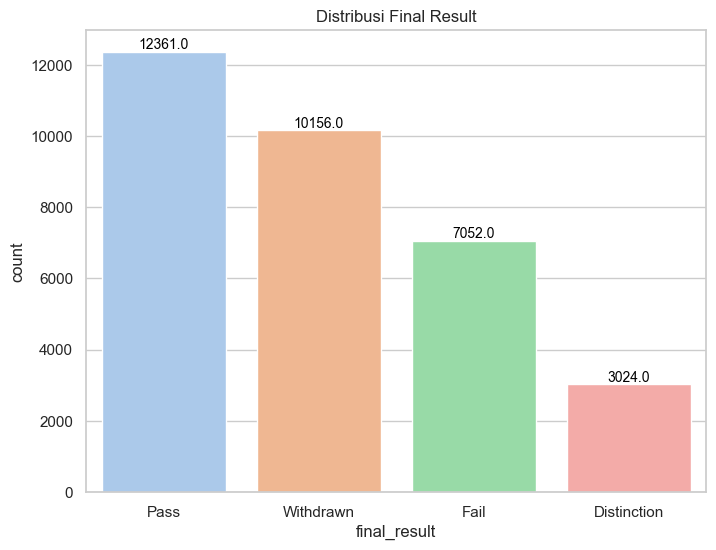

In [4]:
result_distribution = data['final_result'].value_counts()

sns.set(style="whitegrid")
sns.color_palette("pastel")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='final_result', data=data, palette="pastel")

# Menambahkan nilai setiap label di atas batang diagram
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribusi Final Result')
plt.show()

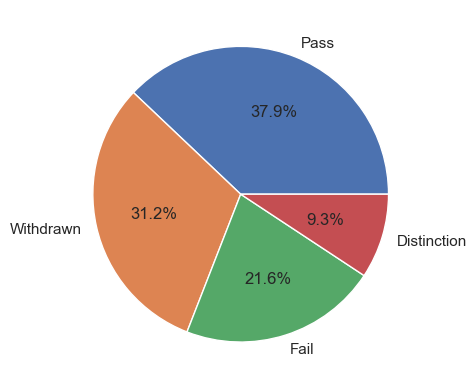

In [5]:
plt.pie(data['final_result'].value_counts().values,
        labels = data['final_result'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [6]:
data = data[data['final_result'].isin(['Pass', 'Fail'])]

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['final_result'] = label_encoder.fit_transform(data['final_result'])

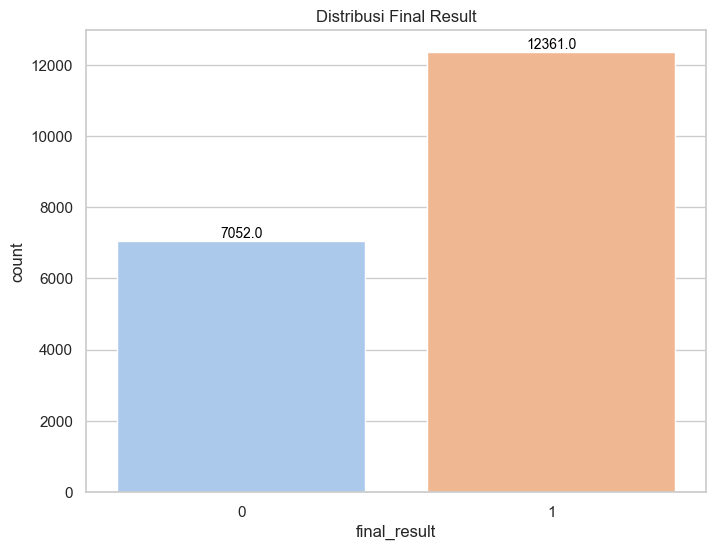

In [8]:
df = data.copy()

# Menghitung distribusi nilai yang sudah diganti
result_distribution = df['final_result'].value_counts()

# Set style seaborn
sns.set(style="whitegrid")
sns.color_palette("pastel")

# Membuat plot dengan Seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='final_result', data=df, palette="pastel")

# Menambahkan nilai setiap label di atas batang diagram
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menampilkan judul
plt.title('Distribusi Final Result')
plt.show()

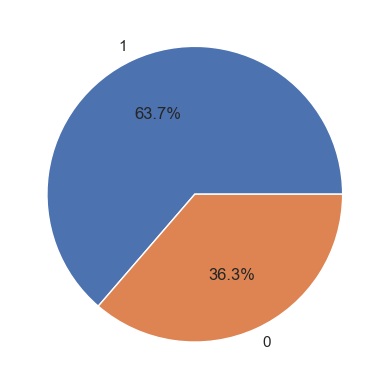

In [9]:
plt.pie(df['final_result'].value_counts().values,
        labels = df['final_result'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

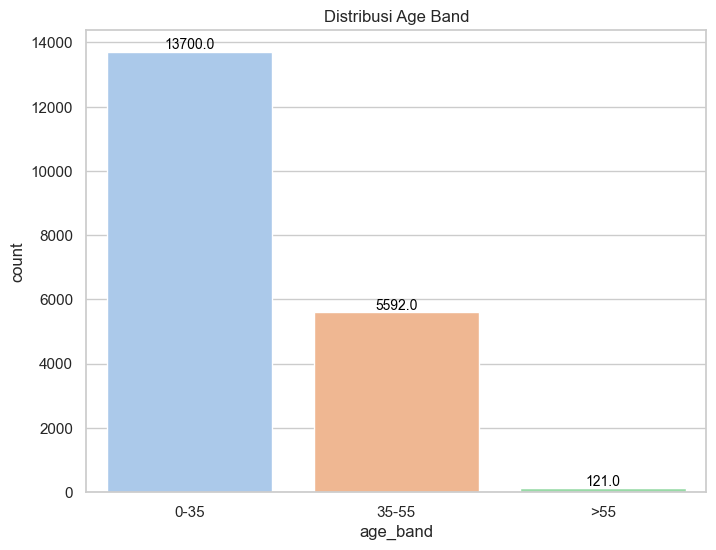

In [10]:
result_distribution = data['age_band'].value_counts()

sns.set(style="whitegrid")
sns.color_palette("pastel")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='age_band', data=data, palette="pastel")

# Menambahkan deskripsi nilai di atas batang diagram
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan deskripsi nilai kategori di atas diagram
ax.set_xticklabels(['0-35', '35-55', '>55'])

plt.title('Distribusi Age Band')
plt.show()

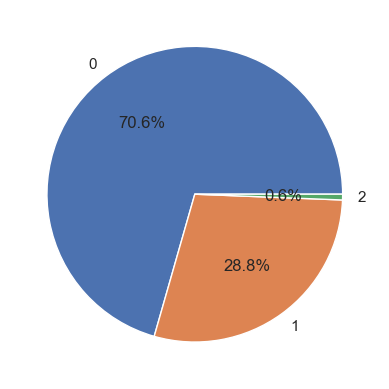

In [11]:
plt.pie(df['age_band'].value_counts().values,
        labels = df['age_band'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

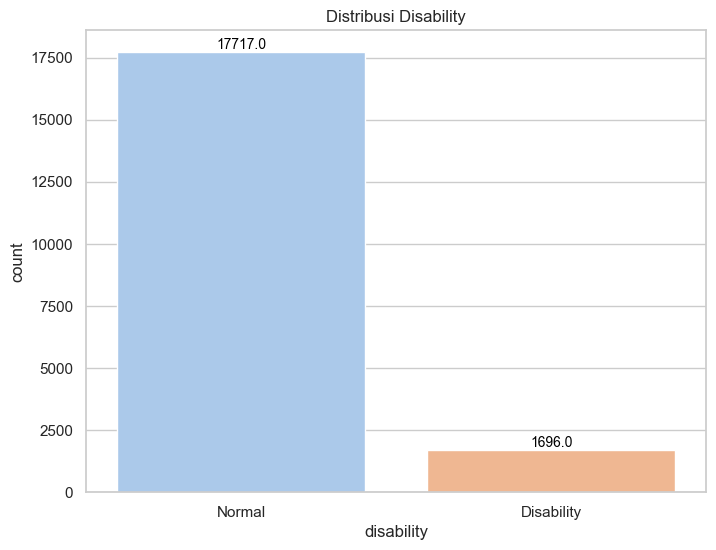

In [12]:
result_distribution = data['disability'].value_counts()

sns.set(style="whitegrid")
sns.color_palette("pastel")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='disability', data=data, palette="pastel")

# Menambahkan deskripsi nilai di atas batang diagram
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan deskripsi nilai kategori di atas diagram
ax.set_xticklabels(['Normal', 'Disability'])

plt.title('Distribusi Disability')
plt.show()

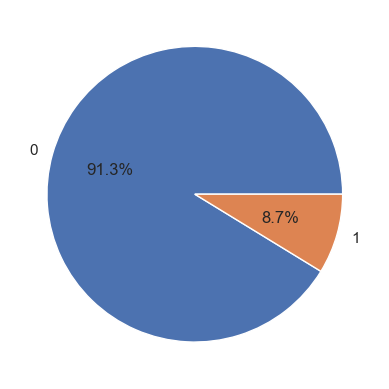

In [13]:
plt.pie(df['disability'].value_counts().values,
        labels = df['disability'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

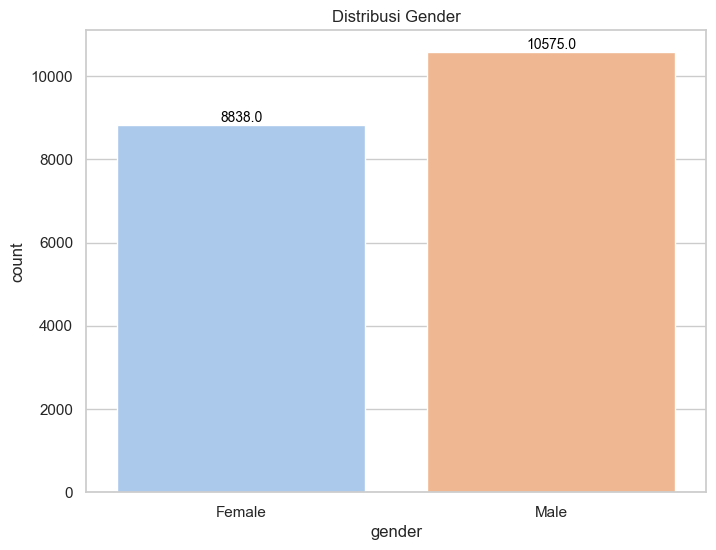

In [14]:
result_distribution = data['gender'].value_counts()

sns.set(style="whitegrid")
sns.color_palette("pastel")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', data=data, palette="pastel")

# Menambahkan deskripsi nilai di atas batang diagram
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan deskripsi nilai kategori di atas diagram
ax.set_xticklabels(['Female', 'Male'])

plt.title('Distribusi Gender')
plt.show()

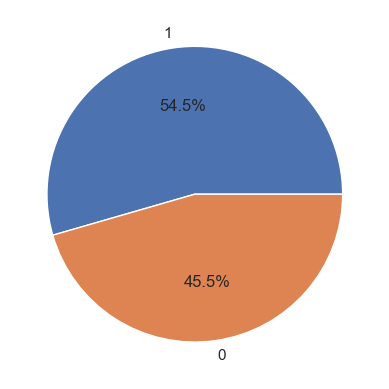

In [15]:
plt.pie(df['gender'].value_counts().values,
        labels = df['gender'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [16]:
data.isnull().sum()

code_module                   0
code_presentation             0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
all_activity_sumclick         0
after_clicks_sum              0
before_clicks_sum             0
forumng_clicks_sum            0
homepage_clicks_sum           0
oucontent_clicks_sum          0
subpage_clicks_sum            0
url_clicks_sum                0
resource_clicks_sum           0
glossary_clicks_sum           0
dataplus_clicks_sum           0
oucollaborate_clicks_sum      0
quiz_clicks_sum               0
ouelluminate_clicks_sum       0
sharedsubpage_clicks_sum      0
questionnaire_clicks_sum      0
page_clicks_sum               0
externalquiz_clicks_sum       0
ouwiki_clicks_sum             0
dualpane_clicks_sum           0
repeatac

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19413 entries, 0 to 32590
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   code_module                 19413 non-null  int64
 1   code_presentation           19413 non-null  int64
 2   gender                      19413 non-null  int64
 3   region                      19413 non-null  int64
 4   highest_education           19413 non-null  int64
 5   imd_band                    19413 non-null  int64
 6   age_band                    19413 non-null  int64
 7   num_of_prev_attempts        19413 non-null  int64
 8   studied_credits             19413 non-null  int64
 9   disability                  19413 non-null  int64
 10  final_result                19413 non-null  int32
 11  all_activity_sumclick       19413 non-null  int64
 12  after_clicks_sum            19413 non-null  int64
 13  before_clicks_sum           19413 non-null  int64
 14  forumng_cli

In [18]:
data['final_result'].value_counts()

final_result
1    12361
0     7052
Name: count, dtype: int64

In [19]:
X = data.drop(columns='final_result')
y = data.final_result

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [21]:
RF_model = RandomForestClassifier(random_state=280)

In [22]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=280)

In [23]:
RF_pred = RF_model.predict(X_test)

In [24]:
RF_classification_rep = classification_report(y_test, RF_pred)
RF_confusion_mat = confusion_matrix(y_test, RF_pred)

In [25]:
print("Classification Report Random Forest:")
print(RF_classification_rep)

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1409
           1       0.90      0.97      0.93      2474

    accuracy                           0.91      3883
   macro avg       0.92      0.89      0.90      3883
weighted avg       0.91      0.91      0.91      3883



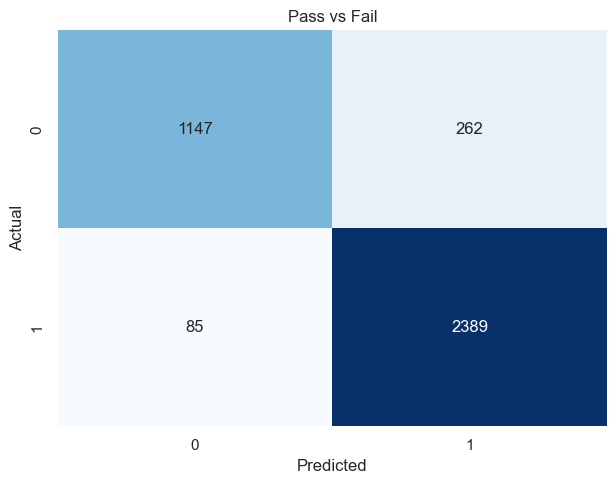

In [26]:
# Plot Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(RF_confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Pass vs Fail')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# FAIRNESS 

In [27]:
exp = dx.Explainer(RF_model, X_test, y_test)

Preparation of a new explainer is initiated

  -> data              : 3883 rows 38 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 3883 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x0000021F5EBF7A60> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.64, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.98, mean = -0.00312, max = 0.94
  -> model_info        : package sklearn

A new explainer has been created!


**Model Performance**

In [28]:
exp.model_performance()

,recall,precision,f1,accuracy,auc
RandomForestClassifier,0.968068,0.900376,0.932996,0.911409,0.955258


**Preparing Fairness Parameter 1**

protected - array dengan nilai subgrup yang menunjukkan atribut sensitif (variabel yang dilindungi) seperti jenis kelamin, ras, umur, dll. Metrik keadilan akan dihitung untuk masing-masing subgrup tersebut dan dibandingkan.

privilede - string yang mewakili salah satu subgrup. String tersebut harus menjadi salah satu yang dicurigai memiliki keistimewaan paling besar.

*Disini saya merubah umur 0-35 menjadi young dan >35 menjadi old

In [29]:
X_test['gender'] = X_test['gender'].replace({0: 'female', 1: 'male'})

In [30]:
# array with values like male_old, female_young, etc.
protected = X_test.gender + '_' + np.where(X_test.age_band == 0, 'young', 'old')

privileged = 'male_young'

**Creating Fairness Model Checker**

In [31]:
fobject = exp.model_fairness(protected = protected, privileged=privileged)

-Epsilon adalah nilai ambang batas antara 0 dan 1 yang digunakan sebagai nilai minimum acceptable dari suatu rasio.

-Pada contoh tersebut, epsilon diatur sebesar 0.8, yang berarti model dianggap adil jika rasio metrik tertentu berada dalam kisaran 0.8 hingga 1.25.

-Epsilon ini mencerminkan prinsip empat perlima (80% rule), yang sering digunakan dalam konteks keadilan

In [32]:
fobject.fairness_check(epsilon = 0.8, verbose=False)

Bias detected in 1 metric: FPR

Conclusion: your model cannot be called fair because 1 criterion exceeded acceptable limits set by epsilon.
It does not mean that your model is unfair but it cannot be automatically approved based on these metrics.

Ratios of metrics, based on 'male_young'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                   TPR       ACC       PPV       FPR       STP
female_old    1.008222  0.990196  0.994444  1.487805  1.144393
female_young  0.974306  0.971678  0.987778  1.243902  1.036866
male_old      1.010277  1.018519  1.030000  1.060976  1.129032


-Tabel menunjukkan perbandingan metrik antara kelompok 'female_old', 'female_young', dan 'male_young'.

-Untuk setiap metrik (TPR, ACC, PPV, FPR, STP), rasio antara kelompok diukur dan dibandingkan dengan nilai epsilon (0.8) dan 1.25.

-Semua nilai rasio berada dalam kisaran (0.8, 1.25), menunjukkan bahwa metrik-metrik tersebut dianggap seimbang sesuai dengan kriteria yang diatur.

**Result**

Atribut hasil adalah metric_scores dimana setiap baris dibagi dengan baris yang diindeks dengan hak istimewa (dalam hal ini male_old).

In [33]:
# to see all scaled metric values you can run
fobject.result

,TPR,TNR,PPV,NPV,FNR,FPR,FDR,FOR,ACC,STP
female_old,1.008222,0.904306,0.994444,0.996852,0.703704,1.487805,1.05,1.063830,0.990196,1.144393
female_young,0.974306,0.952153,0.987778,0.943337,1.925926,1.243902,1.11,2.148936,0.971678,1.036866
male_old,1.010277,0.988038,1.030000,1.003148,0.629630,1.060976,0.73,0.936170,1.018519,1.129032
male_young,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000


**Fairness Check plot**

In [34]:
fobject.plot()

**Metric Scores plot**

In [35]:
# or unscaled ones via
fobject.metric_scores

,TPR,TNR,PPV,NPV,FNR,FPR,FDR,FOR,ACC,STP
female_old,0.981,0.756,0.895,0.950,0.019,0.244,0.105,0.050,0.909,0.745
female_young,0.948,0.796,0.889,0.899,0.052,0.204,0.111,0.101,0.892,0.675
male_old,0.983,0.826,0.927,0.956,0.017,0.174,0.073,0.044,0.935,0.735
male_young,0.973,0.836,0.900,0.953,0.027,0.164,0.100,0.047,0.918,0.651


In [36]:
fobject.plot(type = "metric_scores")

**Preparing Fairness Parameter 2**

*Disini saya merubah kondisi non-disability menjadi normal dan disabilitas tetap menjadi disability nilainya

In [37]:
# array with values like male_old, female_young, etc.
protected2 = X_test.gender + '_' + np.where(X_test.disability == 0, 'normal', 'disability')

privileged2 = 'male_normal'

**Creating Fairness Model Checker**

In [38]:
fobject2 = exp.model_fairness(protected = protected2, privileged=privileged2)


In [39]:
fobject2.fairness_check(epsilon = 0.8)

Bias detected in 1 metric: FPR

Conclusion: your model cannot be called fair because 1 criterion exceeded acceptable limits set by epsilon.
It does not mean that your model is unfair but it cannot be automatically approved based on these metrics.

Ratios of metrics, based on 'male_normal'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                        TPR       ACC       PPV       FPR       STP
female_disability  1.005123  0.964247  0.937294  1.402367  0.982405
female_normal      0.980533  0.972914  0.984598  1.254438  1.026393
male_disability    0.992828  0.996750  0.984598  0.822485  0.875367


**Result**

In [40]:
fobject2.result

,TPR,TNR,PPV,NPV,FNR,FPR,FDR,FOR,ACC,STP
female_disability,1.005123,0.918171,0.937294,1.014690,0.791667,1.402367,1.626374,0.702128,0.964247,0.982405
female_normal,0.980533,0.948255,0.984598,0.949633,1.791667,1.254438,1.153846,2.021277,0.972914,1.026393
male_disability,0.992828,1.036101,0.984598,1.005247,1.291667,0.822485,1.153846,0.893617,0.996750,0.875367
male_normal,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
fobject2.metric_scores

,TPR,TNR,PPV,NPV,FNR,FPR,FDR,FOR,ACC,STP
female_disability,0.981,0.763,0.852,0.967,0.019,0.237,0.148,0.033,0.890,0.670
female_normal,0.957,0.788,0.895,0.905,0.043,0.212,0.105,0.095,0.898,0.700
male_disability,0.969,0.861,0.895,0.958,0.031,0.139,0.105,0.042,0.920,0.597
male_normal,0.976,0.831,0.909,0.953,0.024,0.169,0.091,0.047,0.923,0.682


**Fairness Check plot**

In [42]:
fobject2.plot()

**Metric Scores plot**

In [43]:
fobject2.plot(type = 'metric_scores')